In [1]:
%load_ext autoreload
%autoreload 2

import os
import hydromt
from hydromt_summa.summa import SummaModel
from hydromt import workflows, flw
import xarray as xr
from hydromt.log import setuplog
import numpy as np

/home/ayx374/.local/easybuild/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/home/ayx374/.local/easybuild/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


For hydromt to understand which data is available, open a data catalog:

In [2]:
data_catalogue_path = os.path.join(os.path.expanduser("~"),'projects','rpp-kshook','CompHydCore','datacatalog.yml')
logger = setuplog('test_datacat', log_level=10)
data_catalog = hydromt.DataCatalog(data_catalogue_path, logger=logger)

2022-09-08 18:49:35,029 - test_datacat - log - INFO - HydroMT version: 0.5.1.dev
2022-09-08 18:49:35,031 - test_datacat - data_catalog - INFO - Parsing data catalog from /home/ayx374/projects/rpp-kshook/CompHydCore/datacatalog.yml


Now let's open a SUMMA model instance

In [3]:
root = os.path.join('./summa_bowatbanff_2008_2013')
mod = SummaModel(root=root, mode="w",
                  data_libs=[data_catalogue_path])

Model dir already exists and files might be overwritten: /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/response_units.
Model dir already exists and files might be overwritten: /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/output.


And have a look at the data catalog:

In [4]:
mod.data_catalog

,path,data_type,driver,category,history,source_version,source_url,paper_ref,paper_doi,source_license,notes
era5_for_summa,/home/ayx374/projects/rpp-kshook/CompHydCore/c...,RasterDataset,netcdf,meteo,Extracted from Copernicus Climate Data Store; ...,ERA5 daily data on pressure levels,https://doi.org/10.24381/cds.bd0915c6,Hersbach et al. (2019),10.1002/qj.3803,https://cds.climate.copernicus.eu/cdsapp/#!/te...,NaN
era5_for_summa_mistaya,/home/ayx374/projects/rpp-kshook/CompHydCore/c...,RasterDataset,netcdf,meteo,Extracted from Copernicus Climate Data Store; ...,ERA5 daily data on pressure levels,https://doi.org/10.24381/cds.bd0915c6,Hersbach et al. (2019),10.1002/qj.3803,https://cds.climate.copernicus.eu/cdsapp/#!/te...,NaN
merit_hydro,/home/ayx374/projects/rpp-kshook/CompHydCore/m...,RasterDataset,raster,topography,NaN,1.0,http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_...,Dai Yamazaki (2019),10.1029/2019WR024873,CC-BY-NC 4.0 or ODbL 1.0,NaN
usda_soilclass,/home/ayx374/projects/rpp-kshook/CompHydCore/g...,RasterDataset,raster,soil,NaN,2017,https://www.isric.org/explore/soilgrids/faq-so...,"Knoben, W. J. M. (2021)",10.4211/hs.1361509511e44adfba814f6950c6e742,ODbL,Soilgrids data preprocessed into classes by Wo...
modis_landclass_vrt4326,/home/ayx374/projects/rpp-kshook/CompHydCore/g...,RasterDataset,raster,landuse & landcover,NaN,NaN,NaN,NaN,NaN,NaN,preprocessed vrts


In [5]:
bbox = [-116.55,50.95,-115.52,51.74]
_region = {'subbasin': [[-115.53],[50.964]], 'uparea': 2000, 'bounds': bbox}

In [6]:
dsm = data_catalog.get_rasterdataset('merit_hydro',bbox=bbox)

2022-09-08 18:51:37,302 - test_datacat - data_catalog - INFO - DataCatalog: Getting merit_hydro RasterDataset raster data from /home/ayx374/projects/rpp-kshook/CompHydCore/merit_hydro/vrts/*/{variable}.vrt
2022-09-08 18:51:38,038 - test_datacat - rasterdataset - DEBUG - RasterDataset: Clip with bbox - [-116.550, 50.950, -115.520, 51.740]


In [7]:
r = mod.setup_region(_region)

In [8]:
r

{'uparea': 2000,
 'bounds': [-116.55, 50.95, -115.52, 51.74],
 'xy':                       geometry
 0  POINT (-115.64083 51.17000)}

In [9]:
dsm_clip = dsm.raster.clip_geom(mod.region, mask=True)
dsm_clip

<xarray.Dataset>
Dimensions:      (x: 1218, y: 936)
Coordinates:
  * x            (x) float64 -116.5 -116.5 -116.5 ... -115.5 -115.5 -115.5
  * y            (y) float64 51.73 51.73 51.73 51.73 ... 50.96 50.96 50.96 50.96
    spatial_ref  int64 1
    mask         (y, x) bool False False False False ... False False False False
Data variables:
    rivwth       (y, x) float32 dask.array<chunksize=(936, 1218), meta=np.ndarray>
    uparea       (y, x) float32 dask.array<chunksize=(936, 1218), meta=np.ndarray>
    upgrid       (y, x) int32 dask.array<chunksize=(936, 1218), meta=np.ndarray>
    elevtn       (y, x) float32 dask.array<chunksize=(936, 1218), meta=np.ndarray>
    hnd          (y, x) float32 dask.array<chunksize=(936, 1218), meta=np.ndarray>
    flwdir       (y, x) uint8 dask.array<chunksize=(936, 1218), meta=np.ndarray>
Attributes:
    category:        topography
    source_version:  1.0
    paper_doi:       10.1029/2019WR024873
    paper_ref:       Dai Yamazaki (2019)
    source_url:      http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_Hydro
    source_license:  CC-BY-NC 4.0 or ODbL 1.0

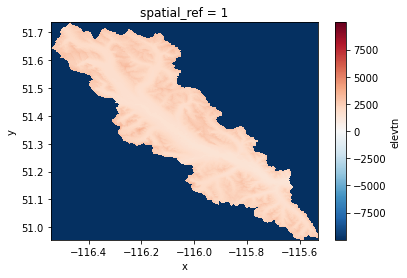

In [10]:
dsm_clip['elevtn'].plot()

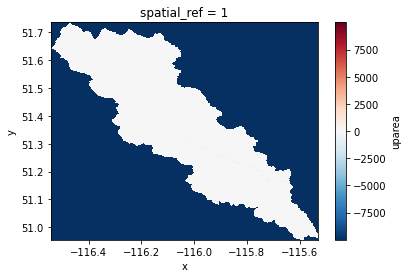

In [11]:
dsm_clip['uparea'].plot()

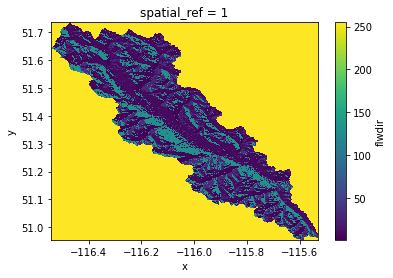

In [12]:
dsm_clip['flwdir'].plot()

In [11]:
ds = mod.data_catalog.get_rasterdataset("merit_hydro", geom = mod.region)
ruds = workflows.hydrography_to_basins(
    ds,
    mod.region,
    "us_area",
    area_min=100,
)

In [12]:
ruds

<xarray.Dataset>
Dimensions:          (index: 16)
Coordinates:
  * index            (index) float64 16.0 15.0 14.0 13.0 ... 1.0 5.0 2.0 3.0
    geometry         (index) object POLYGON ((-116.47041666666665 51.73541666...
    outlet_geometry  (index) object POINT (-115.64083333333333 51.17) ... POI...
    spatial_ref      int64 0
Data variables:
    *empty*

<AxesSubplot:>

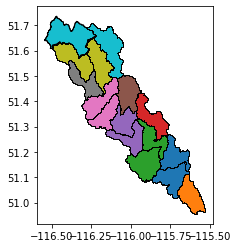

In [13]:
subbasins_gpd = workflows.ru_geometry_to_gpd(ruds)
subbasins_gpd.plot(column='value',edgecolor='black',categorical=True)

In [14]:
mod.setup_response_unit(
    hydrography_fn="merit_hydro",
    split_regions = True,        
    split_method = "pfafstetter",
    depth=1,
)

In [15]:
# add downstream links
dl = mod.setup_downstream_links()

<AxesSubplot:>

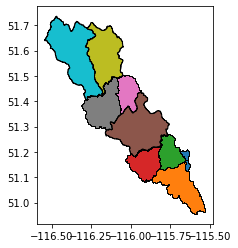

In [16]:
# plot response_unit geometries
workflows.ru_geometry_to_gpd(
    mod.response_units).plot(column='value',edgecolor='black',categorical=True)

In [19]:
#%timeit -n 1 -r 1 dsf = mod.data_catalog.get_rasterdataset('era5_for_summa',bbox=bbox, time_tuple=('2008-01-01 00:00','2013-12'))

In [20]:
dsf = mod.data_catalog.get_rasterdataset('era5_for_summa',bbox=bbox, time_tuple=('2008-01-01 00:00','2013-12')) # can take ~30s

In [21]:
dsf

<xarray.Dataset>
Dimensions:      (longitude: 4, latitude: 3, time: 52608)
Coordinates:
  * longitude    (longitude) float32 -116.5 -116.2 -116.0 -115.8
  * latitude     (latitude) float32 51.5 51.25 51.0
  * time         (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:00:00
    spatial_ref  int64 0
Data variables:
    LWRadAtm     (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    SWRadAtm     (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    pptrate      (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    airpres      (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    airtemp      (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    spechum      (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
    windspd      (time, latitude, longitude) float32 dask.array<chunksize=(744, 3, 4), meta=np.ndarray>
Attributes: (12/14)
    History:                                  Created Mon Jul 12 15:57:16 2021
    Language:                                 Written using Python
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2021-06-19 18:11:16 GMT by grib...
    Conventions (surface level data):         CF-1.6
    ...                                       ...
    history:                                  Extracted from Copernicus Clima...
    source_version:                           ERA5 daily data on pressure levels
    source_url:                               https://doi.org/10.24381/cds.bd...
    paper_ref:                                Hersbach et al. (2019)
    paper_doi:                                10.1002/qj.3803
    source_license:                           https://cds.climate.copernicus....

In [22]:
mod.setup_forcing('era5_for_summa', get_rasterdataset_kwargs = {'time_tuple':('2008-01-01 00:00','2013-12-31')}, all_touched=True)

In [23]:
mod.forcing

{'LWRadAtm_mean': <xarray.DataArray 'LWRadAtm_mean' (index: 9, time: 52608)>
 dask.array<concatenate, shape=(9, 52608), dtype=float32, chunksize=(1, 744), chunktype=numpy.ndarray>
 Coordinates:
   * time         (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:00:00
     spatial_ref  int64 1
   * index        (index) float64 8.0 9.0 6.0 7.0 5.0 1.0 3.0 4.0 2.0,
 'SWRadAtm_mean': <xarray.DataArray 'SWRadAtm_mean' (index: 9, time: 52608)>
 dask.array<concatenate, shape=(9, 52608), dtype=float32, chunksize=(1, 744), chunktype=numpy.ndarray>
 Coordinates:
   * time         (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:00:00
     spatial_ref  int64 1
   * index        (index) float64 8.0 9.0 6.0 7.0 5.0 1.0 3.0 4.0 2.0,
 'pptrate_mean': <xarray.DataArray 'pptrate_mean' (index: 9, time: 52608)>
 dask.array<concatenate, shape=(9, 52608), dtype=float32, chunksize=(1, 744), chunktype=numpy.ndarray>
 Coordinates:
   * time         (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:00:00
 

In [24]:
mod.data_catalog = hydromt.data_catalog.DataCatalog(data_catalogue_path)
mod.setup_soilclass('usda_soilclass')
mod.response_units

nodata value missing for /home/ayx374/projects/rpp-kshook/CompHydCore/geospatialParameterData/soil/soilgrids/global/usda_mode_soilclass_250m_ll.tif


<xarray.Dataset>
Dimensions:              (index: 9, soil: 4)
Coordinates:
  * index                (index) float64 8.0 9.0 6.0 7.0 5.0 1.0 3.0 4.0 2.0
    geometry             (index) object POLYGON ((-116.25208333333333 51.7104...
    outlet_geometry      (index) object POINT (-115.64083333333333 51.17) ......
    spatial_ref          int64 0
  * soil                 (soil) float32 0.0 3.0 8.0 12.0
Data variables:
    down_id              (index) float64 0.0 1.0 1.0 3.0 3.0 5.0 5.0 7.0 7.0
    tax_usda_fraction    (index, soil) float64 0.04852 0.7119 ... 0.1184 0.0
    tax_usda_count_mode  (index) float32 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0

In [25]:
mod.setup_elevation()

In [26]:
mod.data_catalog = hydromt.data_catalog.DataCatalog(data_catalogue_path)
mod.setup_landclass('modis_landclass_vrt4326')

In [27]:
mod.response_units

<xarray.Dataset>
Dimensions:               (index: 9, soil: 4, landclass: 10)
Coordinates:
  * index                 (index) float64 8.0 9.0 6.0 7.0 5.0 1.0 3.0 4.0 2.0
    geometry              (index) object POLYGON ((-116.25208333333333 51.710...
    outlet_geometry       (index) object POINT (-115.64083333333333 51.17) .....
    spatial_ref           int64 0
  * soil                  (soil) float32 0.0 3.0 8.0 12.0
  * landclass             (landclass) uint8 1 7 8 9 10 11 13 15 16 17
Data variables:
    down_id               (index) float64 0.0 1.0 1.0 3.0 3.0 5.0 5.0 7.0 7.0
    tax_usda_fraction     (index, soil) float64 0.04852 0.7119 ... 0.1184 0.0
    tax_usda_count_mode   (index) float32 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
    elevtn_mean           (index) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    landclass_fraction    (index, landclass) float64 0.1305 0.0 ... 0.03051 0.0
    landclass_count_mode  (index) uint8 10 10 10 1 1 8 10 10 10

In [28]:
mod.write_response_units()

In [29]:
#%% write model specific files
mod.write_forcing()

In [3]:
#%% write model specific files
mod.write_filemanager()
mod.copy_base_files()
mod.write_states()
mod.write_trial_params()
mod.write_attributes()

NameError: name 'mod' is not defined

In [14]:
mod.run('/home/ayx374/installs/summa/bin/summa.exe')

 executable string is /home/ayx374/installs/summa/bin/summa.exe -m /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/fileManager.txt
file_master is '/home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/fileManager.txt'.
   1 controlVersion: SUMMA_FILE_MANAGER_V3.0.0
   2 simStartTime: 2008-01-01 00:00
   3 simEndTime: 2013-12-31 23:00
   4 tmZoneInfo: utcTime
   5 outFilePrefix: test_hydromt_summa
   6 settingsPath: /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/
   7 forcingPath: /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/forcing/
   8 outputPath: /home/ayx374/Github/hydromt_summa/examples/graham/summa_bowatbanff_2008_2013/output/
   9 initConditionFile: coldState.nc
  10 attributeFile: attributes.nc
  11 trialParamFile: trialParams.nc
  12 forcingListFile: forcingFileList.txt
  13 decisionsFile: modelDecisions.txt
  14 outputControlFile: outputControl.txt
  15 globalHruP